In [1]:
from brian2 import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
spikes=np.load('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/spk_arr2.npy')
cell_identity=np.load('/media/maria/DATA1/Documents/NeuroMatchAcademy2020_dat/cell_identity2.npy')

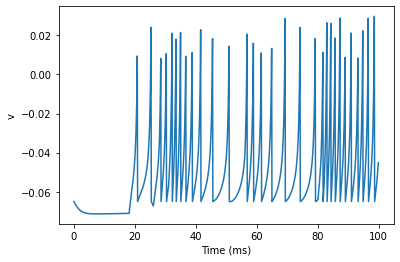

In [29]:
number=1
b = 0.2/ms
c = -65 * mV
#I = 15*mV/ms


#Neuronal equations of the Izhikevich-neuron
eqs = '''
dv/dt = (0.04/ms/mV)*v**2+(5/ms)*v+140*mV/ms-u+I : volt
du/dt = a*(b*v-u)                                : volt/second
a                                                : 1/second
d                                                : volt/second
I: volt/second
'''


reset = '''
v = c
u = u + d
'''


#Set up neuron population
spikes_gen=SpikeGeneratorGroup(1000,list(cell_identity),spikes*1000*ms)
G = NeuronGroup(number,eqs,threshold='v >= 30*mV',reset=reset,method='euler')
S = Synapses(spikes_gen, G, on_pre='I += 15*mV/ms')
S.connect(p=0.1)
G.a = 0.02/ms
G.d = 8*mV/ms
G.v = c
G.u = b * c


M = StateMonitor(G,'v', record=True)


run(100*ms)


figure
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');


In [ ]:
show